In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('breast-cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.drop(['id'],inplace=True,axis=1)

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
x = df.iloc[:,1:]
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y = df.iloc[:,0]
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

In [ ]:
#from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=15)

In [ ]:
ann = Sequential()
ann.add(Dense(units=20,activation='relu'))
ann.add(Dropout(rate=0.2))
ann.add(Dense(units=12,activation='relu'))
ann.add(Dropout(rate=0.2))
ann.add(Dense(units=1,activation='sigmoid'))

In [ ]:
ann.compile(optimizer="sgd",loss='binary_crossentropy',metrics=['accuracy'])
#ann.fit(xtrain,ytrain,epochs=300,validation_data=(xtest,ytest),verbose=2,batch_size=32,callbacks=[early_stop])
ann.fit(xtrain,ytrain,epochs=100,batch_size=32,verbose=2)

Epoch 1/100
13/13 - 1s - loss: 0.7329 - accuracy: 0.5302 - 842ms/epoch - 65ms/step
Epoch 2/100
13/13 - 0s - loss: 0.6759 - accuracy: 0.6131 - 41ms/epoch - 3ms/step
Epoch 3/100
13/13 - 0s - loss: 0.6270 - accuracy: 0.6910 - 38ms/epoch - 3ms/step
Epoch 4/100
13/13 - 0s - loss: 0.6091 - accuracy: 0.7337 - 39ms/epoch - 3ms/step
Epoch 5/100
13/13 - 0s - loss: 0.5871 - accuracy: 0.7588 - 39ms/epoch - 3ms/step
Epoch 6/100
13/13 - 0s - loss: 0.5330 - accuracy: 0.8317 - 39ms/epoch - 3ms/step
Epoch 7/100
13/13 - 0s - loss: 0.5314 - accuracy: 0.8291 - 38ms/epoch - 3ms/step
Epoch 8/100
13/13 - 0s - loss: 0.5027 - accuracy: 0.8618 - 47ms/epoch - 4ms/step
Epoch 9/100
13/13 - 0s - loss: 0.4726 - accuracy: 0.8794 - 38ms/epoch - 3ms/step
Epoch 10/100
13/13 - 0s - loss: 0.4677 - accuracy: 0.8894 - 38ms/epoch - 3ms/step
Epoch 11/100
13/13 - 0s - loss: 0.4412 - accuracy: 0.8643 - 39ms/epoch - 3ms/step
Epoch 12/100
13/13 - 0s - loss: 0.4235 - accuracy: 0.8869 - 40ms/epoch - 3ms/step
Epoch 13/100
13/13 - 0s

In [ ]:
ann.history.history

{'loss': [0.7328905463218689,
  0.6758669018745422,
  0.62700355052948,
  0.6091101765632629,
  0.5871075391769409,
  0.5329514741897583,
  0.531440258026123,
  0.5027480125427246,
  0.4726089537143707,
  0.4677387773990631,
  0.441237211227417,
  0.4235389232635498,
  0.41275596618652344,
  0.38888171315193176,
  0.39179766178131104,
  0.3528221845626831,
  0.3379170000553131,
  0.34400805830955505,
  0.3407496511936188,
  0.31047311425209045,
  0.3113422691822052,
  0.2766707241535187,
  0.28226810693740845,
  0.26396825909614563,
  0.26099833846092224,
  0.265903502702713,
  0.24844910204410553,
  0.24689143896102905,
  0.23384270071983337,
  0.22200150787830353,
  0.2382694035768509,
  0.20472782850265503,
  0.19843995571136475,
  0.2251126617193222,
  0.21068960428237915,
  0.19101786613464355,
  0.21041648089885712,
  0.17845340073108673,
  0.17862741649150848,
  0.2051442712545395,
  0.1874808818101883,
  0.180113285779953,
  0.1630374938249588,
  0.17014504969120026,
  0.153589

<Axes: >

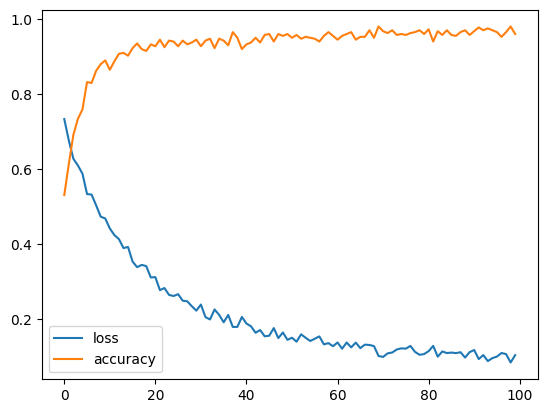

In [ ]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()

In [ ]:
ypred=ann.predict(xtest)

6/6 [==============================] - 0s 2ms/step


In [ ]:
ypred = ypred>0.5

In [ ]:
ypred = np.where(ypred<0.5,0,1)

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

